# TensorFlowHub w/ CIFAR-10
- The hub provides several pre-trained models on the CIFAR10 dataset
- Since we're using the CIFAR-10 dataset too, don't need to fine-tune

## Import Libraries

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

import random
random.seed(17)

## Load Dataset


### Preprocessing

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize to 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Preview Images

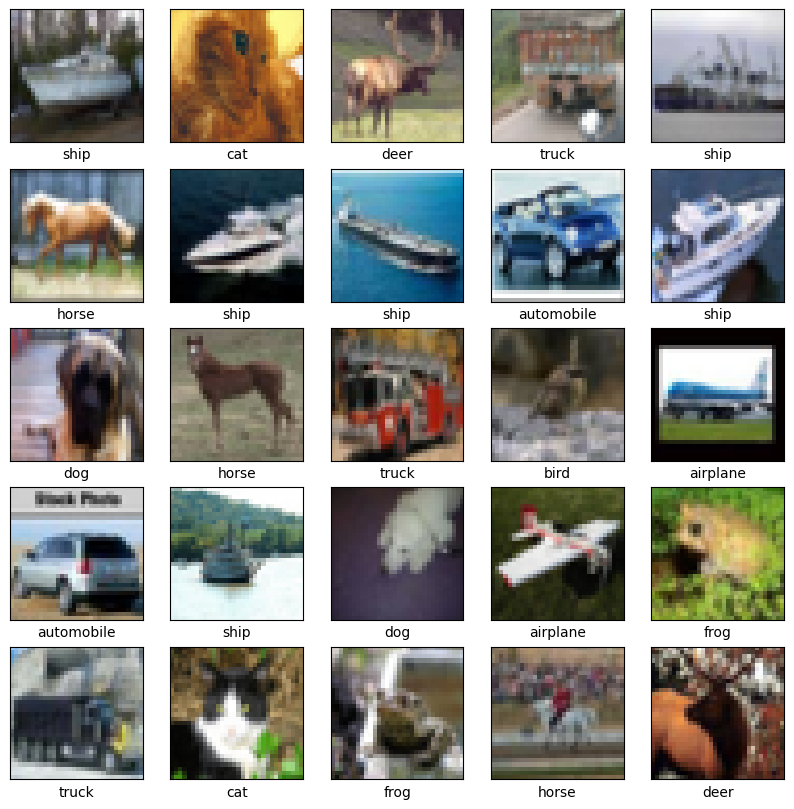

In [3]:
CLASS_NAMES = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

train_idx = list(range(len(train_labels)))
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[train_labels[random_sample[i]][0]])
plt.show()

## Model

### Train/Val/Test Split

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### Build Model

In [5]:
model_handle = 'https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1'
hub_layer = hub.KerasLayer(model_handle, trainable=False)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(32,32) + (3,)),
    tf.keras.layers.Lambda(lambda x: hub_layer(x))
])

### Compile Model

In [6]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Evaluate Model
- Note that we can skip the training step

In [7]:
_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - accuracy: 0.9435 - loss: 0.1992
The model accuracy is 94.5%


## Make Predictions

### Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
automobile


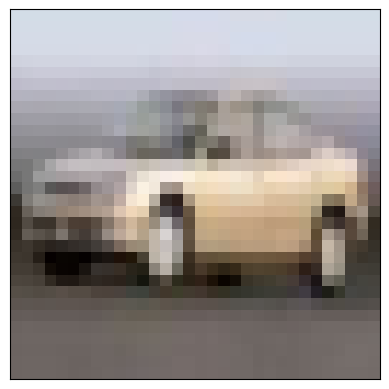

In [8]:
IMAGE_ID = 7260 #Pick an image id between 5000 and 9999 inclusive

def get_prediction(image_id):
    img = test_images[image_id]
    img = np.expand_dims(img, 0)
    pred = model.predict(img)
    pred = np.argmax(pred)
    print(CLASS_NAMES[pred])
    plt.figure()
    plt.imshow(test_images[image_id], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

get_prediction(IMAGE_ID)

### Multiple Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


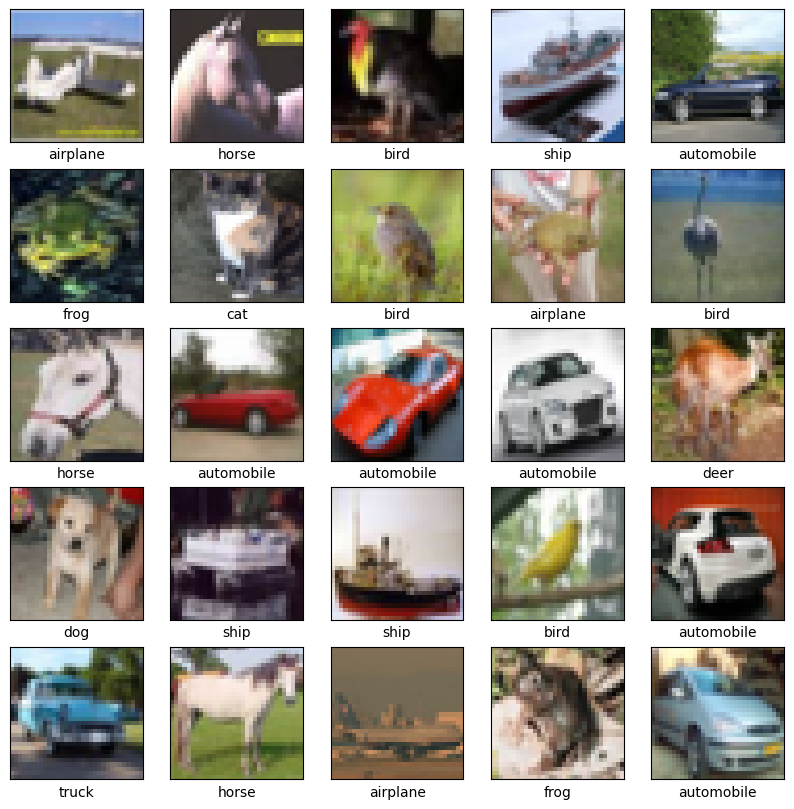

In [9]:
test_idx = list(range(5000,10000))
random_sample = random.sample(test_idx, 25)

def get_pred_id(image_id):
    img = test_images[image_id]
    img = np.expand_dims(img, 0)
    pred = model.predict(img)
    pred = np.argmax(pred)
    return pred
pred_labels = [get_pred_id(i) for i in random_sample]

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[pred_labels[i]])
plt.show()